# Infering the phylogenetic relationship between archaic and AMH Y

In [1]:
library(tidyverse)
library(here)
library(phangorn)
library(cowplot)
library(lemon)

suppressPackageStartupMessages({
    library(ggtree)
    library(treeio)
})

devtools::load_all(".")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
here() starts at /mnt/expressions/mp/ychr
Loading required package: ape

********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************


Attaching package: ‘lemon’

The following object is masked from ‘package:purrr’:

    %||%

Loading ychr


Bootstrapping info for ape/phangorn: http://ape-package.ird.fr/ape_faq.html#bootphylo

In [2]:
aln <- read.dna("../den4_new.fa", format = "fasta")

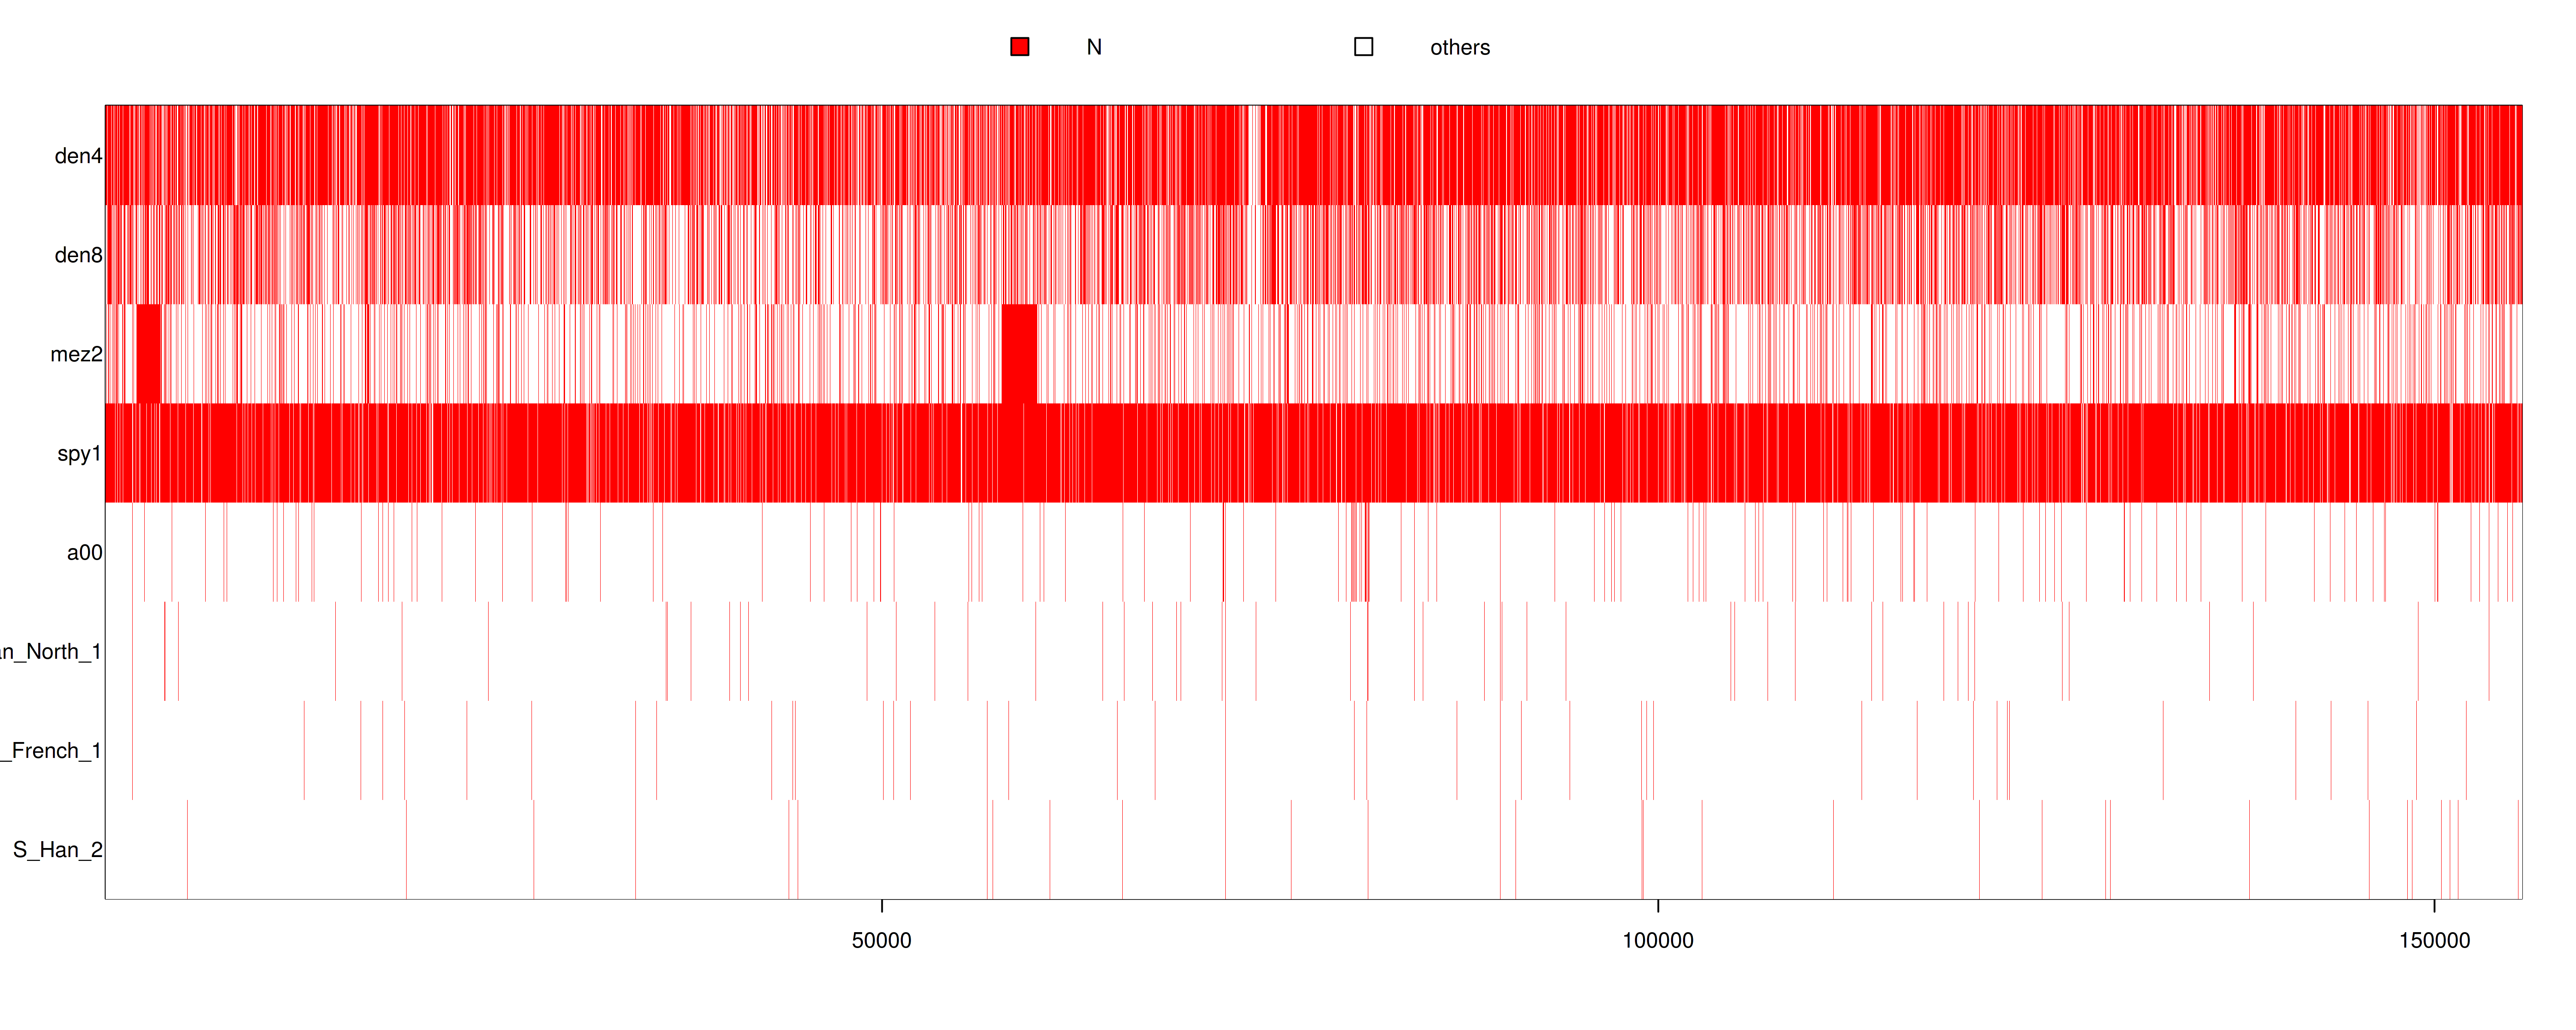

In [3]:
set_dim(20, 8)
image(aln[c("den4", "den8", "mez2", "spy1", "a00", "S_Ju_hoan_North_1", "S_French_1", "S_Han_2"), ], "N")

### Pairwise distances vs Mezmaiskaya 2 using `dist.dna` from ape

Without pairwise deletion:

In [4]:
for (m in c("raw", "N", "JC69", "F81", "TN93", "K80")) {
    cat(m, "\n")
    dist.dna(aln, model = m, pairwise.deletion = F) %>%
        as.matrix %>%
        .["mez2", ] %>%
        t %>%
        .[, c("S_Karitiana_1", "a00", "den4", "chimp", "S_Mbuti_1")] %>% print
}

raw 
S_Karitiana_1           a00          den4         chimp     S_Mbuti_1 
  0.005184705   0.002592353   0.006480881   0.975372651   0.003240441 
N 
S_Karitiana_1           a00          den4         chimp     S_Mbuti_1 
            8             4            10          1505             5 
JC69 
S_Karitiana_1           a00          den4         chimp     S_Mbuti_1 
  0.005202709   0.002596843   0.006509045           NaN   0.003247461 
F81 
S_Karitiana_1           a00          den4         chimp     S_Mbuti_1 
  0.005203874   0.002597133   0.006510870           NaN   0.003247915 
TN93 
S_Karitiana_1           a00          den4         chimp     S_Mbuti_1 
  0.005205158   0.002597714   0.006513516           NaN   0.003248824 
K80 
S_Karitiana_1           a00          den4         chimp     S_Mbuti_1 
  0.005203597   0.002597407   0.006509187           NaN   0.003248345 


With pairwise deletion:

In [5]:
for (m in c("raw", "N", "JC69", "F81", "TN93", "K80")) {
    cat(m, "\n")
    dist.dna(aln, model = m, pairwise.deletion = T) %>%
        as.matrix %>%
        .["mez2", ] %>%
        t %>%
        .[, c("S_Karitiana_1", "a00", "den4", "chimp", "S_Mbuti_1")] %>% print
}

raw 
S_Karitiana_1           a00          den4         chimp     S_Mbuti_1 
   0.01098407    0.01169877    0.01412288    0.97245391    0.01125184 
N 
S_Karitiana_1           a00          den4         chimp     S_Mbuti_1 
         1367          1434           368        121371          1393 
JC69 
S_Karitiana_1           a00          den4         chimp     S_Mbuti_1 
   0.01106529    0.01179097    0.01425755           NaN    0.01133709 
F81 
S_Karitiana_1           a00          den4         chimp     S_Mbuti_1 
   0.01107058    0.01179698    0.01426634           NaN    0.01134265 
TN93 
S_Karitiana_1           a00          den4         chimp     S_Mbuti_1 
   0.01107084    0.01179816    0.01426975           NaN    0.01134308 
K80 
S_Karitiana_1           a00          den4         chimp     S_Mbuti_1 
   0.01106529    0.01179121    0.01425840           NaN    0.01133710 


### Pairwise distances vs Mezmaiskaya 2 using `dist.ml` from phangorn

Only two molecular evolution models are implemented, JC69 and F81:

In [6]:
for (m in c("JC69", "F81")) {
    cat(m, "\n")
    dist.ml(aln, model = m, exclude = "none") %>%
        as.matrix %>%
        .["mez2", ] %>%
        t %>%
        .[, c("S_Karitiana_1", "a00", "den4", "chimp", "S_Mbuti_1")] %>% print
}

JC69 
S_Karitiana_1           a00          den4         chimp     S_Mbuti_1 
   0.01106529    0.01179097    0.01425755   10.00000000    0.01133709 
F81 
S_Karitiana_1           a00          den4         chimp     S_Mbuti_1 
   0.01145466    0.01219791    0.01484075   10.00000000    0.01173424 


In [7]:
for (m in c("JC69", "F81")) {
    cat(m, "\n")
    dist.ml(aln, model = m, exclude = "pairwise") %>%
        as.matrix %>%
        .["mez2", ] %>%
        t %>%
        .[, c("S_Karitiana_1", "a00", "den4", "chimp", "S_Mbuti_1")] %>% print
}

JC69 
S_Karitiana_1           a00          den4         chimp     S_Mbuti_1 
   0.01106529    0.01179097    0.01425755   10.00000000    0.01133709 
F81 
S_Karitiana_1           a00          den4         chimp     S_Mbuti_1 
   0.01145466    0.01219791    0.01484075   10.00000000    0.01173424 


In [8]:
for (m in c("JC69", "F81")) {
    cat(m, "\n")
    dist.ml(aln, model = m, exclude = "all") %>%
        as.matrix %>%
        .["mez2", ] %>%
        t %>%
        .[, c("S_Karitiana_1", "a00", "den4", "chimp", "S_Mbuti_1")] %>% print
}

JC69 
S_Karitiana_1           a00          den4         chimp     S_Mbuti_1 
  0.005202709   0.002596843   0.006509045  10.000000000   0.003247461 
F81 
S_Karitiana_1           a00          den4         chimp     S_Mbuti_1 
  0.005285867   0.002637025   0.006616214  10.000000000   0.003299097 


It seems that given that it's important to use pairwise deletion (due to the large number of missing sites in ancient Y chromosomes), any reasonable default model is fine here. The "vs-chimp" distances are giving NaN values for some `dist.dna` models and also are always fixed to a hardcoded value 10 by the `dist.ml` function. After looking at the code, this seems to be a default value for overflow situations, which is affecting both methods regardless of the molecular evolution model (except for models which are simply based on the proportion of matching alleles such as the "raw" option in `dist.dna`).

It's also quite interesting that the "raw" proportions of sites give the same values as those obtained by more sophisticated models. I suppose this makes sense given the relatively short evolutionary time scale I'm dealing with here.

**Note**: Yeah, so the man page for `dist.dna` clearly says that

> If the sequences are very different, most evolutionary distances are undefined and a non-finite value (Inf or NaN) is returned. You may do dist.dna(, model = "raw") to check whether some values are higher than 0.75.

The explanation for this magic number comes from the limitations of the substitution models and is quite obvious from looking at the distance equations:

More details [here](https://www.megasoftware.net/mega1_manual/Distance.html):
> The Jukes-Cantor distance can be computed if p < 0.75; otherwise it is not applicable because the argument of the logarithm becomes negative. 

From the [mailing list](https://r-sig-phylo.r-project.narkive.com/NjZMUVzZ/bootstrapping-with-boot-phylo):
> the correct distance for (say) the Jukes-Cantor model or the Kimura 2-parameter model when the sequences differ by more than 75% is (positive) infinity, since these are inferred to be unrelated sequences

> Most models ("K80", "JC69" etc.) are not defined for distances >=0.75 and will return Inf or NaN (the 0.75 can vary a bit, depending on the substitution model)

In [4]:
aln <- read.phyDat("../../ychr_backup/data/fasta/full_merged_tv.fa", format = "fasta")

for (s in c("a00_1", "a00_2", "ustishim", "S_Punjabi_1", "S_Papuan_2", "S_Sardinian_1", "S_French_1", "S_Burmese_1", "S_Dai_2", "S_Han_2", "S_Turkish_1")) {
    aln[[s]] <- NULL
}
for (s in c("S_Dinka_1", "S_Gambian_1", "S_Mbuti_1", "S_Mandenka_1", "S_Yoruba_2")) {
    aln[[s]] <- NULL
}

aln <- as.DNAbin(aln)

In [13]:
buildtree_dist.dna_pairwise_midpoint <- function(x) midpoint(nj(dist.dna(x, model = "raw", pairwise.deletion = T)))

In [14]:
tr <- buildtree_dist.dna_pairwise_midpoint(aln)
bp <- boot.phylo(tr, aln, buildtree_dist.dna_pairwise_midpoint, B = 100, mc.cores = 40)

Running parallel bootstraps... done.
Calculating bootstrap values... done.


In [15]:
tr$tip.label <- fix_name(tr$tip.label) %>%
    str_replace_all("S_(.*)_\\d+", "\\1") %>%
    str_replace("Ju_hoan_North", "Ju\\|\\'hoan")

In [16]:
tr$edge.length <- ifelse(tr$edge.length < 0, 0, tr$edge.length)

In [17]:
tr <- as.treedata(tr, bp)

In [18]:
tr <- drop.tip(tr, tip = "chimp")
den_node <- getMRCA(as.phylo(tr), tip = c("Denisova 4", "Denisova 8"))
neand_node <- getMRCA(as.phylo(tr), tip = c("Spy 94a", "Mezmaiskaya 2"))
amh_node <- getMRCA(as.phylo(tr), tip = c("A00", "Saami"))
amhneand_node <- getMRCA(as.phylo(tr), tip = c("A00", "Mezmaiskaya 2"))
root_node <- getMRCA(as.phylo(tr), tip = c("Denisova 4", "A00"))

In [19]:
df <- as_tibble(tr) %>%
    filter(!is.na(label)) %>%
    select(name = label) %>%
    mutate(set = case_when(name %in% c("Denisova 4", "Denisova 8") ~ "Denisova",
                           name %in% c("Spy 94a", "Mezmaiskaya 2") ~ "Neanderthal",
                           name == "A00" ~ "A00",
                           TRUE ~ "other")) %>%
    mutate(sample_name = fix_name(name) %>% str_replace("^S_", ""))

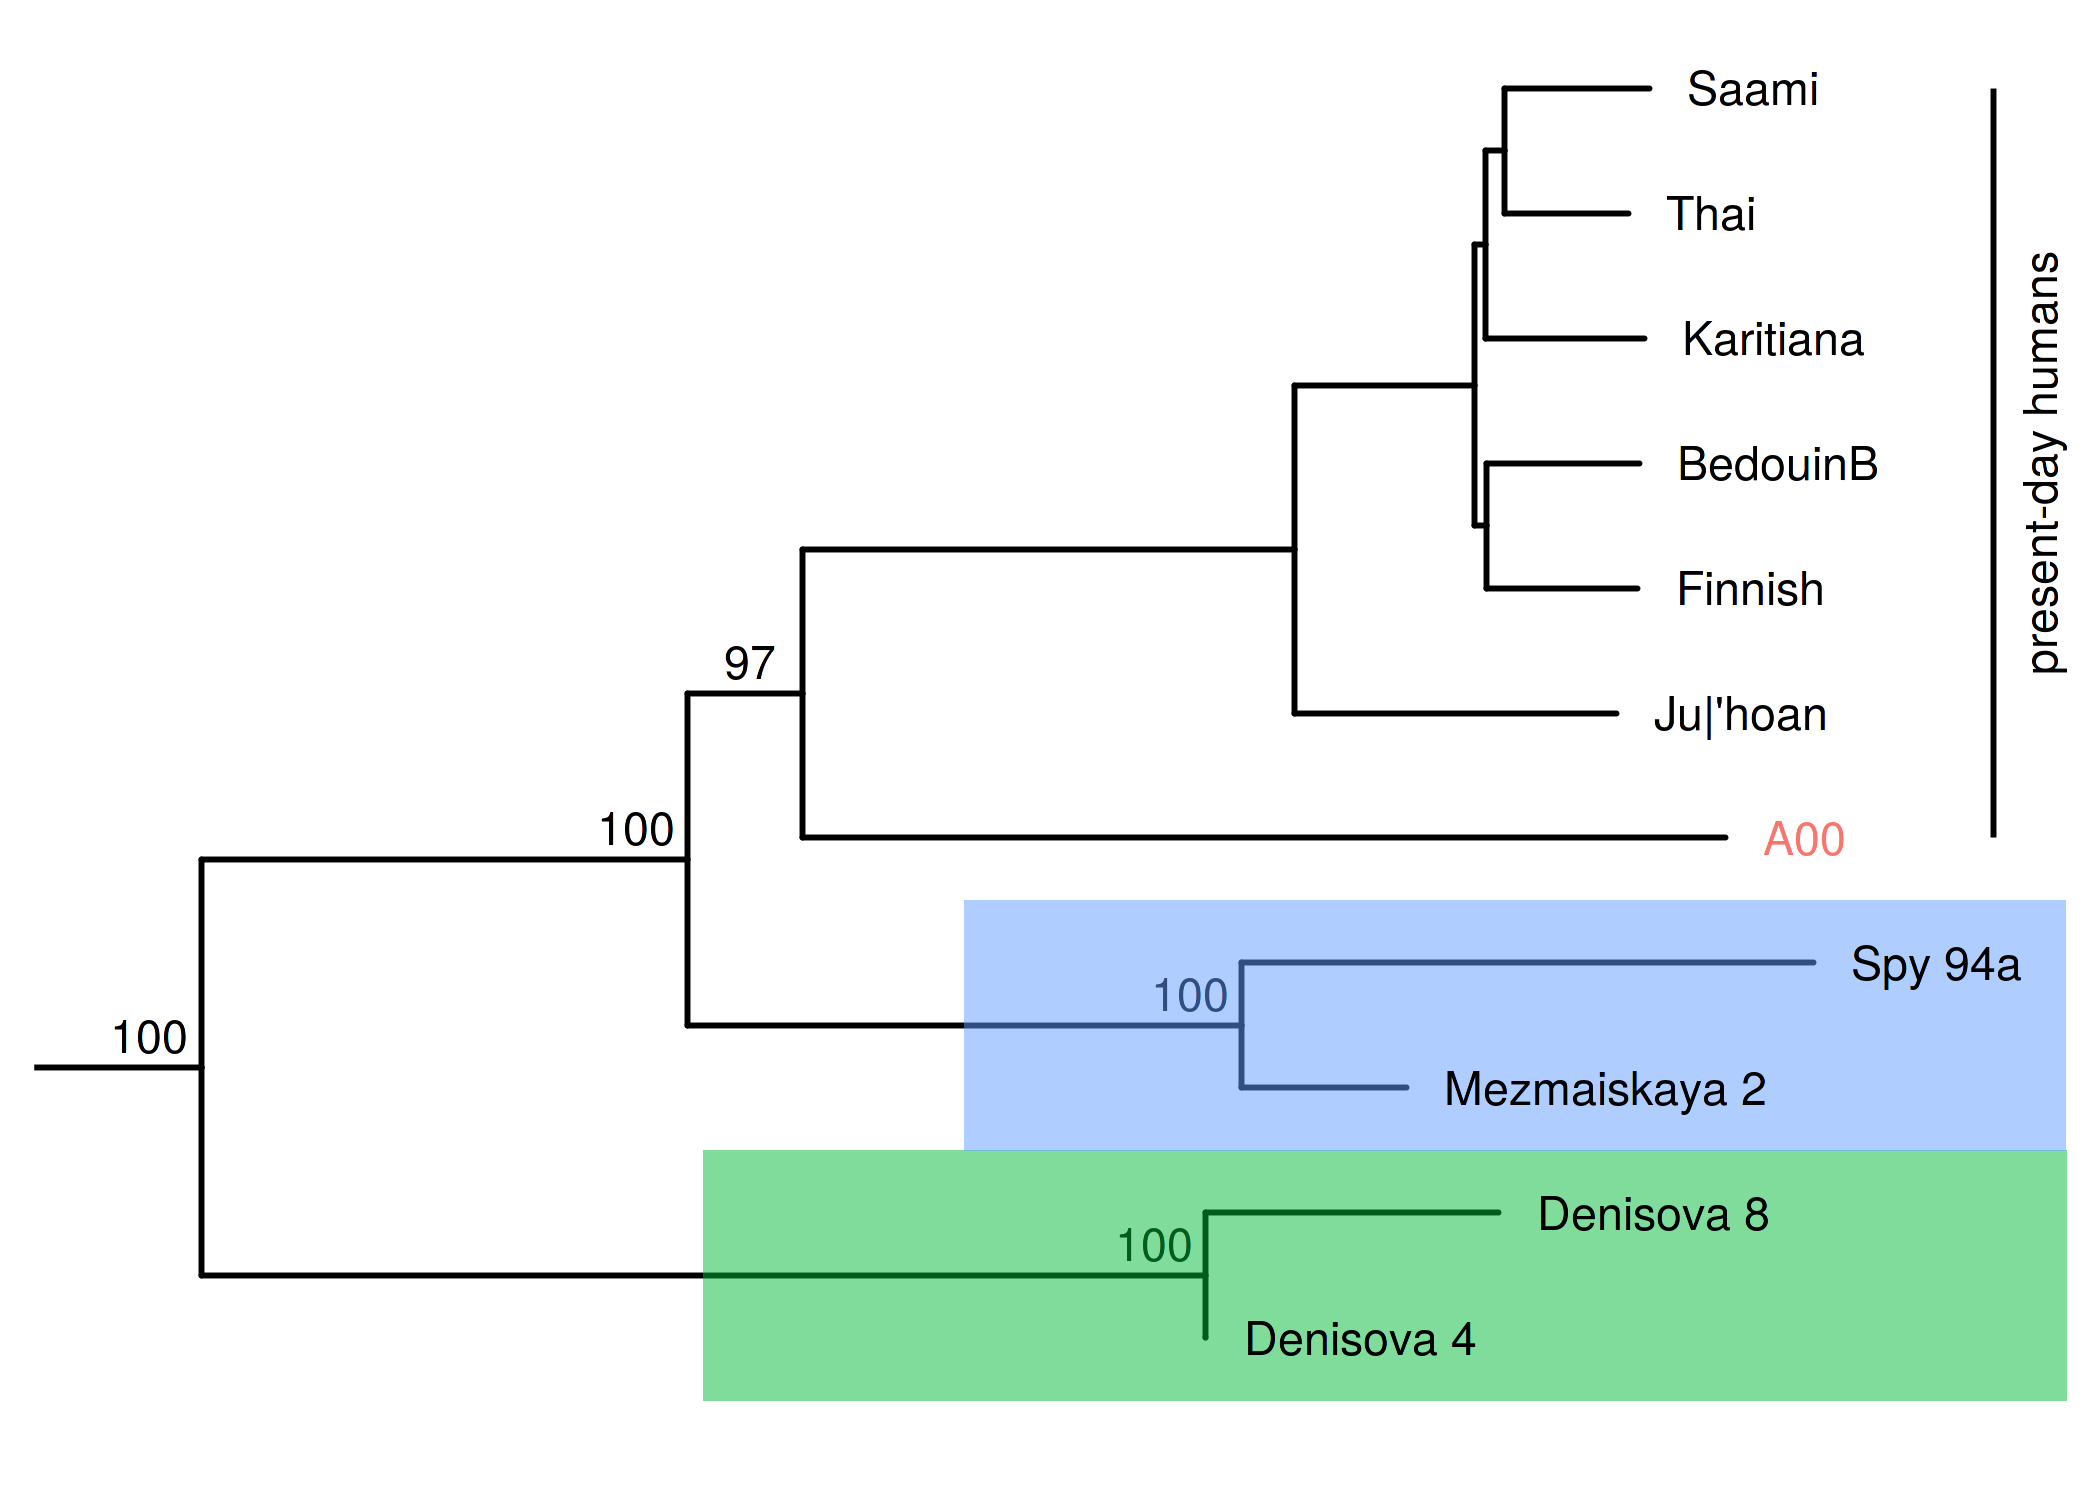

In [551]:
set_dim(7, 5)

colors <- scales::hue_pal()(3)

p <- ggtree(tr) +
    geom_text2(nudge_y = 0.25, nudge_x = -0.00035, aes(label = bootstrap,
                   subset = node %in% c(den_node, neand_node, amh_node, amhneand_node, root_node))) +
    geom_hilight(node = den_node, fill = colors[2], extend = 0.0038225) +
    geom_hilight(node = neand_node, fill = colors[3], extend = 0.0017) +

#     geom_cladelabel(node = den_node, label = "Denisovans", angle = 45, offset = 0.0015, align = T, color = colors[1]) +
#     geom_cladelabel(node = neand_node, label = "Neanderthals", angle = 45, offset = 0.0015, align = T, color = colors[2]) +
    geom_cladelabel(offset.text = 0.0002, node = amh_node, angle = 90, hjust = "center", offset = 0.001, align = T, label = "present-day humans") +

    geom_rootedge(rootedge = root_node)

p %<+% df +
    geom_tiplab(aes(color = sample_name == "A00"), offset = 0.0002) +
    scale_color_manual(values = c("black", colors[1])) +
    coord_capped_cart(gap = 1, x = c(-0.0005, 0.012), bottom = "both", left = "none")# + theme_tree2()

## Maximum parsimony

In [86]:
aln_phyDat <- as.phyDat(aln)

for (s in c("a00_1", "a00_2", "ustishim", "S_Punjabi_1", "S_Sardinian_1", "S_Saami_2", "S_Burmese_1", "S_Dai_2", "S_Turkish_1")) {
    aln_phyDat[[s]] <- NULL
}
for (s in c("S_Dinka_1", "S_Gambian_1", "S_Mbuti_1", "S_Mandenka_1", "S_Yoruba_2")) {
    aln_phyDat[[s]] <- NULL
}

aln <- as.DNAbin(aln_phyDat)

In [87]:
init_tree <- nj(dist.dna(aln, model = "raw"))

In [88]:
parsimony(init_tree, aln_phyDat)

[1] 154782

In [89]:
tree_pars <- optim.parsimony(init_tree, aln_phyDat)

Final p-score 154532 after  4 nni operations 


In [90]:
parsimony(tree_pars, aln_phyDat)

[1] 154532

In [93]:
tree_pars


Phylogenetic tree with 14 tips and 12 internal nodes.

Tip labels:
	S_Karitiana_1, S_Han_2, a00, den4, S_Thai_1, S_Finnish_2, ...

Unrooted; no branch lengths.

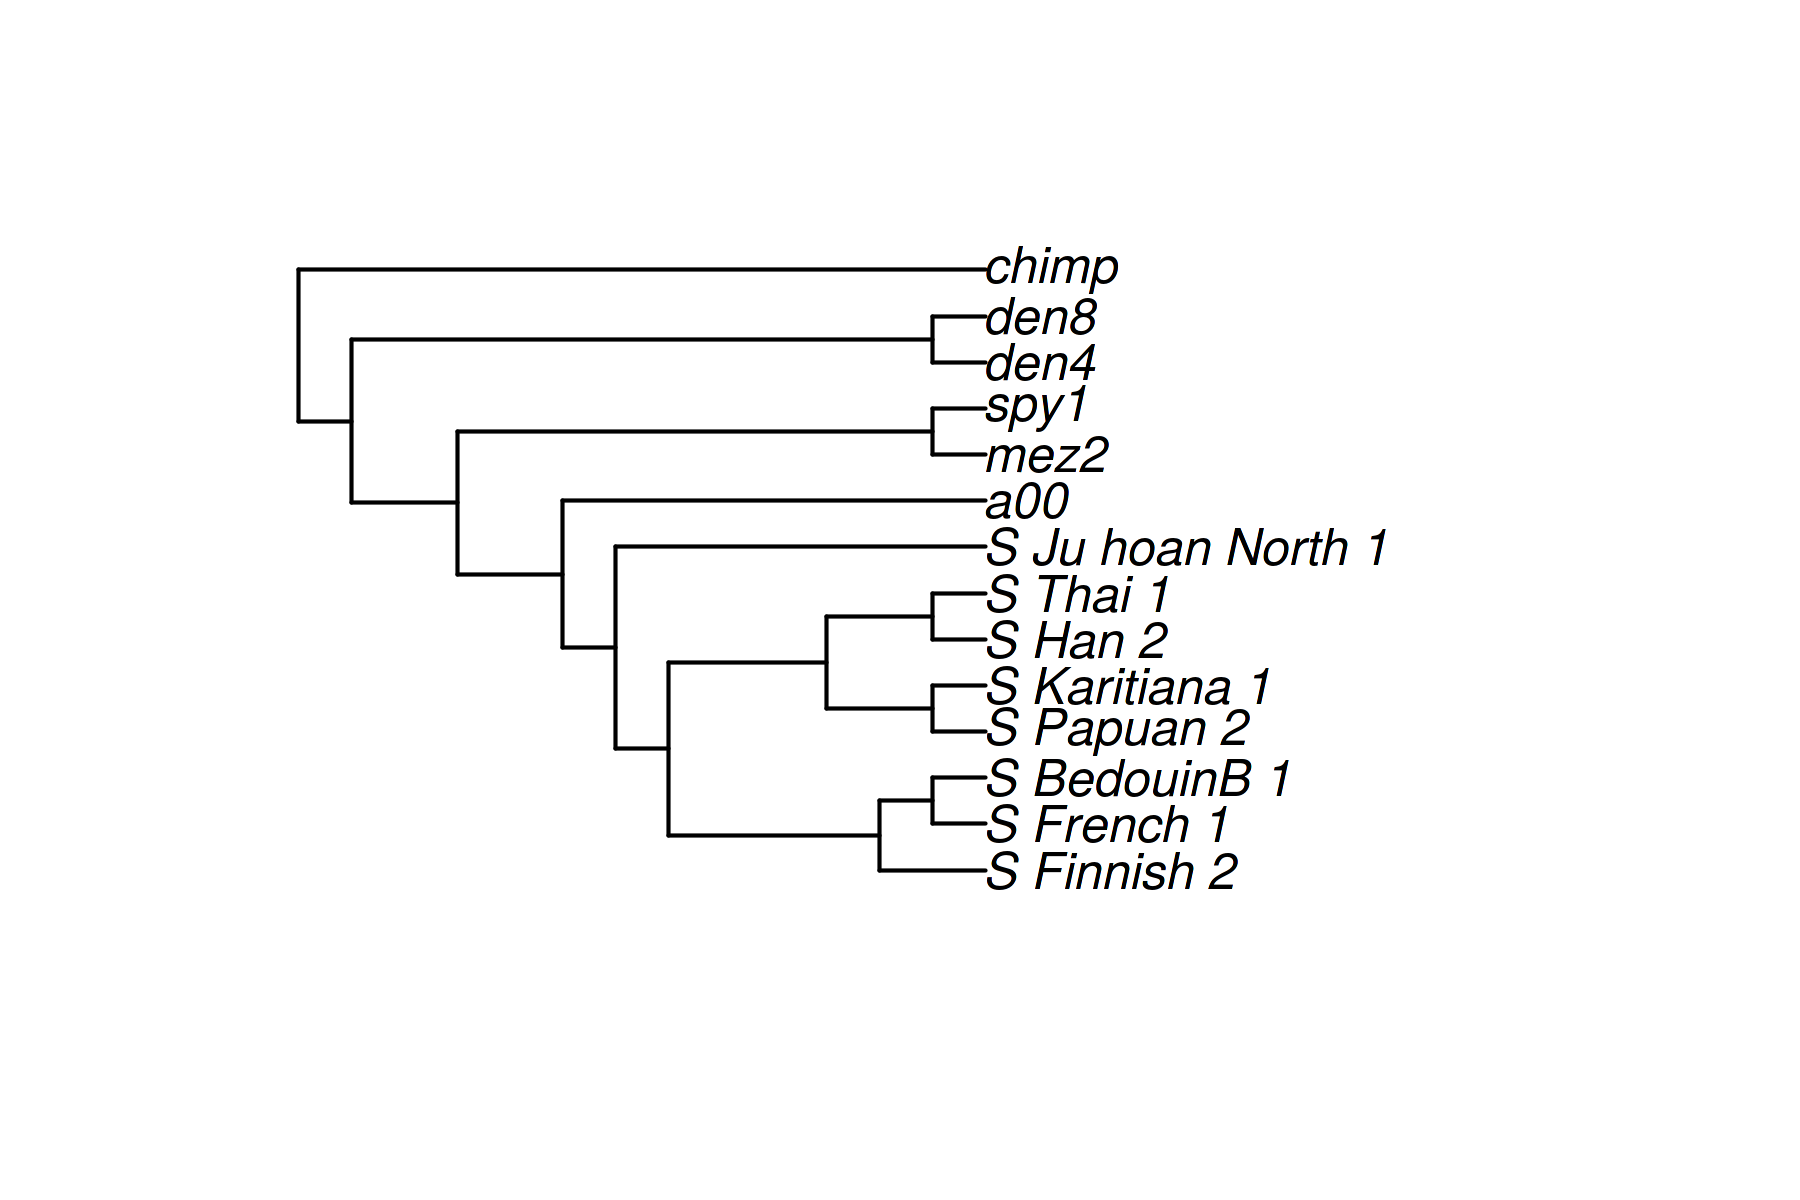

In [92]:
plot(root(tree_pars, outgroup = "chimp", resolve.root = T))

# Old neighbor-joining tree plotting code

In [9]:
plot_tree <- function(fasta, fun) {
    alignment <- read.phyDat(fasta, format = "fasta")

    for (s in c("a00_1", "a00_2", "ustishim", "S_Punjabi_1", "S_Sardinian_1", "S_Saami_2", "S_Burmese_1", "S_Dai_2", "S_Turkish_1")) {
        alignment[[s]] <- NULL
    }
    for (s in c("S_Dinka_1", "S_Gambian_1", "S_Mbuti_1", "S_Mandenka_1", "S_Yoruba_2")) {
        alignment[[s]] <- NULL
    }

    alignment <- as.DNAbin(alignment)
    tr <- fun(alignment)
    bp <- boot.phylo(tr, alignment, fun, B = 100, mc.cores = 40)
    tree <- as.treedata(tr, bp)

    df <- as_tibble(tree) %>%
        filter(!is.na(label)) %>%
        select(name = label) %>%
        mutate(set = case_when(name %in% c("den4", "den8") ~ "Denisova",
                               name %in% c("spy1", "mez2", "elsidron2", "elsidron1") ~ "Neanderthal",
                               TRUE ~ "other"))

    p <- ggtree(tree, branch.length = "none") +
        geom_label(aes(label = bootstrap)) +
        xlim(0, 11)

    p %<+% df +
        geom_tiplab(aes(color = set)) +
        scale_color_manual(values = c("springgreen4", "blue2", "black"))
}

In [10]:
buildtree_dist.ml <- function(x) root(nj(dist.ml(x)), outgroup = "chimp", resolve.root = TRUE)

In [11]:
buildtree_dist.dna_pairwise <- function(x) root(nj(dist.dna(x, model = "raw", pairwise.deletion = T)), outgroup = "chimp", resolve.root = TRUE)

As is pretty clear from the comparison of distance matrices above, both `dist.dna` and `dist.ml` methods return the same tree topology (but the broken chimp distances = 10 above are a problem):

Running parallel bootstraps... done.
Calculating bootstrap values... done.


Warning message:
“Removed 14 rows containing missing values (geom_label).”

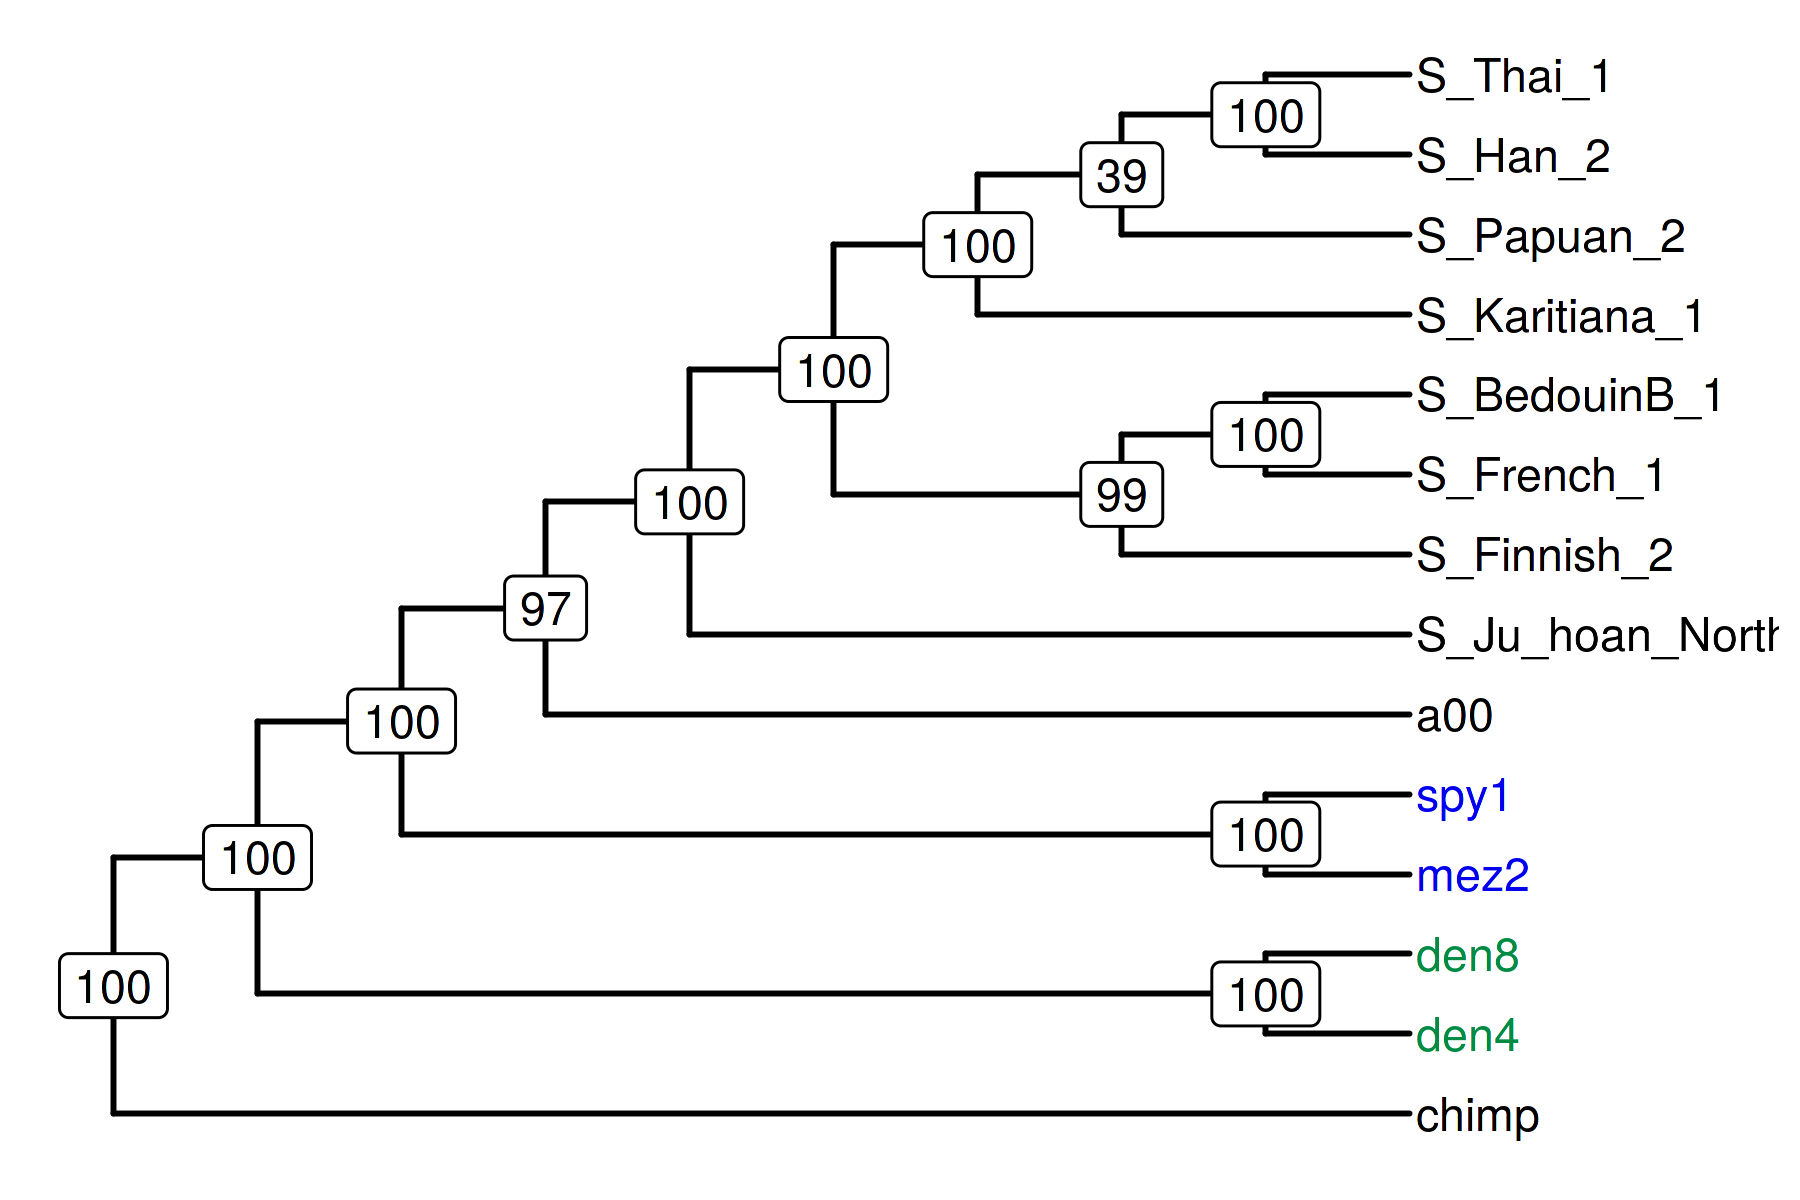

In [12]:
set_dim(6, 4)
plot_tree("../den4_new.fa", buildtree_dist.dna_pairwise)

Running parallel bootstraps... done.
Calculating bootstrap values... done.


Warning message:
“Removed 14 rows containing missing values (geom_label).”

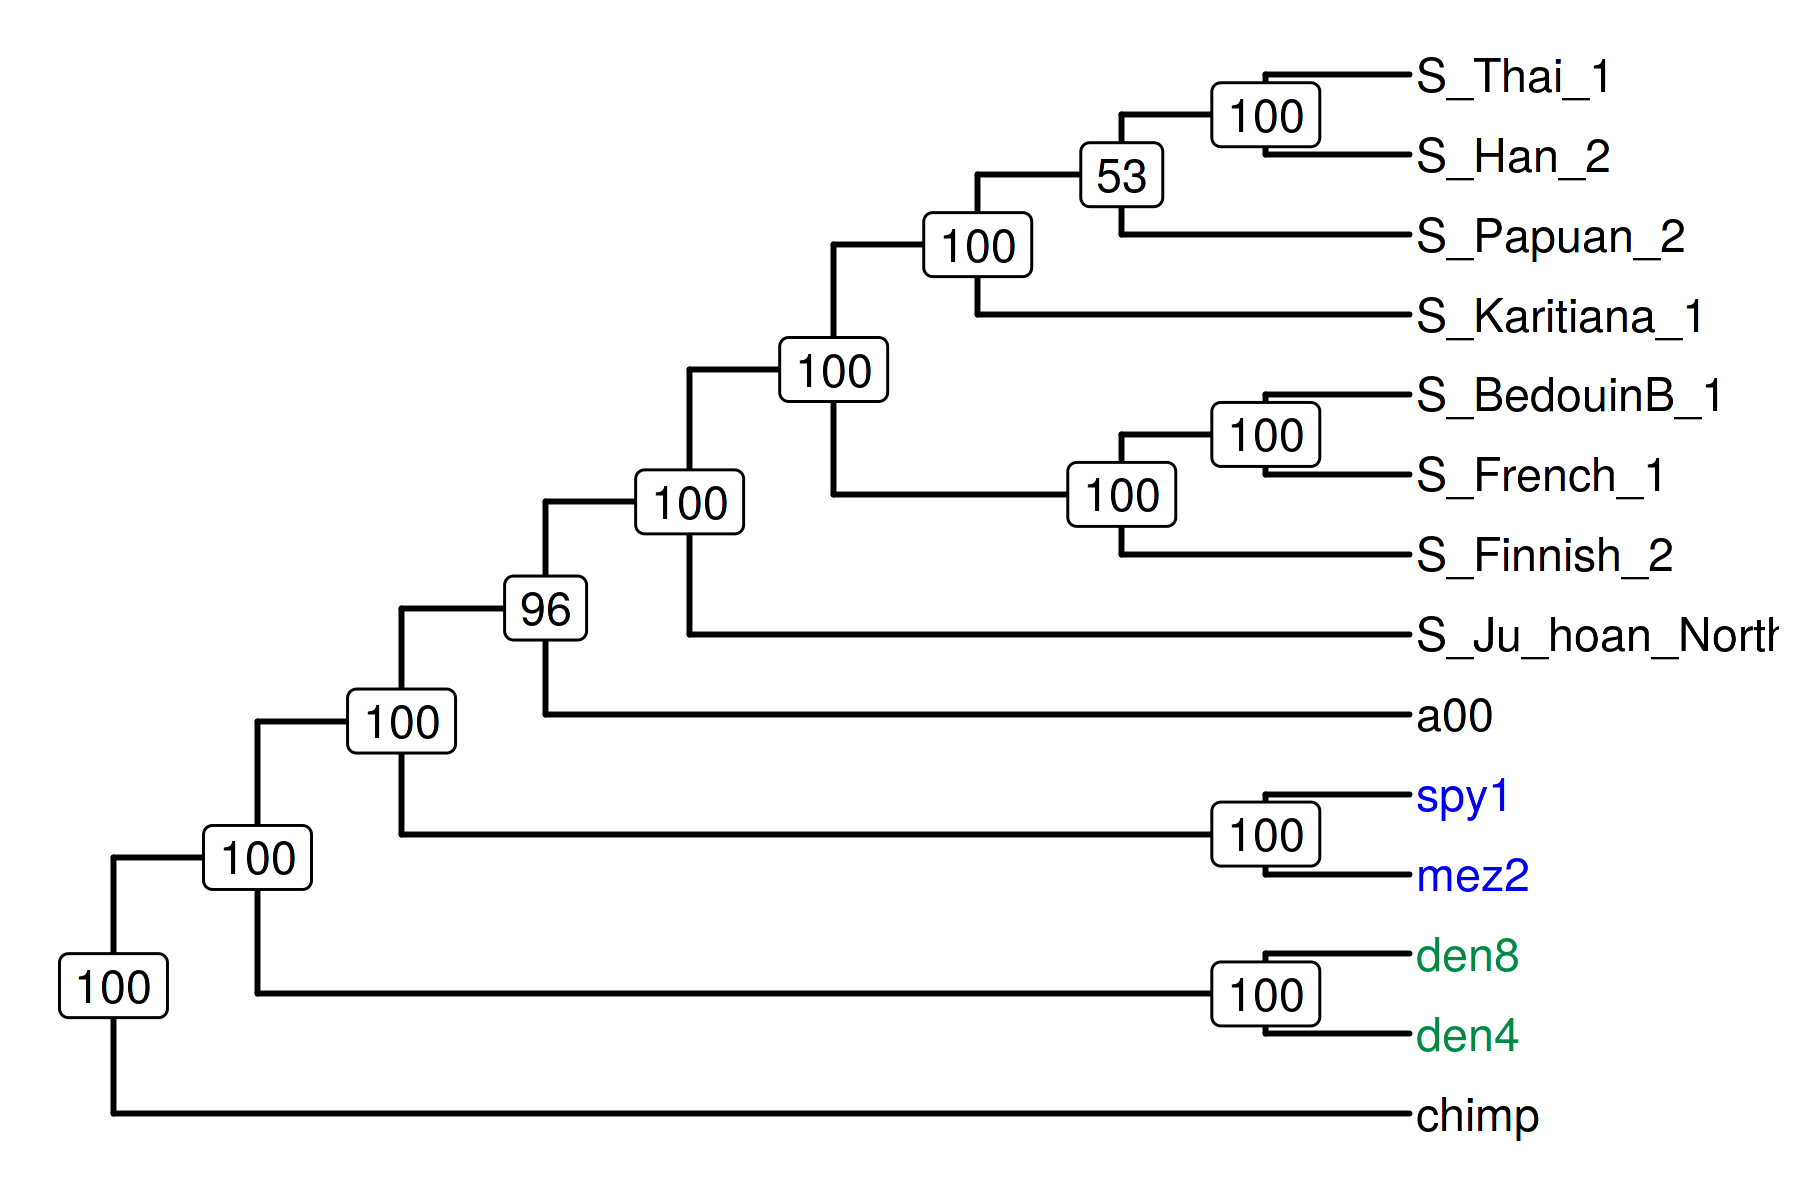

In [13]:
plot_tree("../den4_new.fa", buildtree_dist.ml)